In [2]:
#Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
#Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on trendi, mutta ei havaittavaa kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head()

,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82


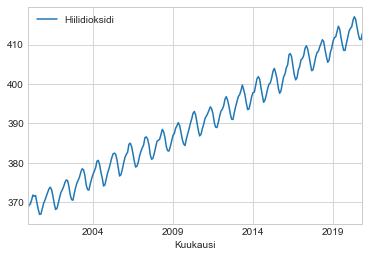

In [4]:
df = df.rename(columns = {'CO2': 'Hiilidioksidi'})
df.plot()

In [5]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#freq-parametrille käytän arvoa 'MS', koska kyseessä on kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Hiilidioksidi'], trend = 'add', freq='MS').fit()

In [6]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Hiilidioksidi,Ennuste
Kuukausi,,
1999-12-01,368.04,369.231801
2000-01-01,369.25,368.054914
2000-02-01,369.50,370.459524
2000-03-01,370.56,369.750406
2000-04-01,371.82,371.619662
...,...,...
2020-07-01,414.38,415.690380
2020-08-01,412.55,412.380237
2020-09-01,411.29,410.719819


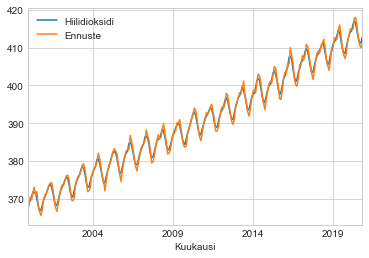

In [7]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [8]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Hiilidioksidi,Ennuste,Ennustevirhe
Kuukausi,,,
1999-12-01,368.04,369.231801,-1.191801
2000-01-01,369.25,368.054914,1.195086
2000-02-01,369.50,370.459524,-0.959524
2000-03-01,370.56,369.750406,0.809594
2000-04-01,371.82,371.619662,0.200338
...,...,...,...
2020-07-01,414.38,415.690380,-1.310380
2020-08-01,412.55,412.380237,0.169763
2020-09-01,411.29,410.719819,0.570181


Text(0, 0.5, 'Ennustevirhe')

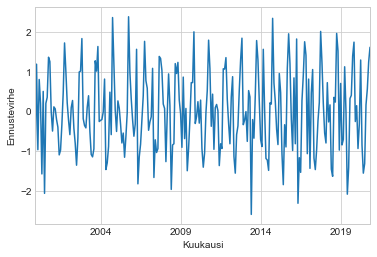

In [9]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

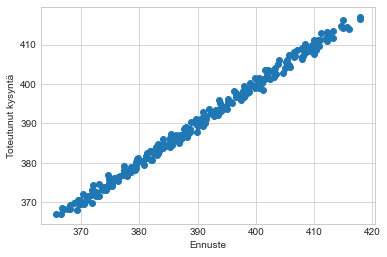

In [10]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Hiilidioksidi'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [11]:
malli.summary()

Dep. Variable:,endog,No. Observations:,252
Model:,ExponentialSmoothing,SSE,257.293
Optimized:,True,AIC,13.238
Trend:,Additive,BIC,27.356
Seasonal:,None,AICC,13.581
Seasonal Periods:,None,Date:,"Fri, 15 Jan 2021"
Box-Cox:,False,Time:,15:45:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999003,alpha,True
smoothing_slope,0.9999003,beta,True


In [12]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Hiilidioksidi,Ennuste,Ennustevirhe
Kuukausi,,,
2020-07-01,414.38,415.690380,-1.310380
2020-08-01,412.55,412.380237,0.169763
2020-09-01,411.29,410.719819,0.570181
2020-10-01,411.28,410.029846,1.250154
2020-11-01,412.89,411.269683,1.620317


In [15]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-12-01', periods = 12, freq = 'MS')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-12-01,414.499640
2021-01-01,416.109442
2021-02-01,417.719243
2021-03-01,419.329045
2021-04-01,420.938846
2021-05-01,422.548648
2021-06-01,424.158449
2021-07-01,425.768251
2021-08-01,427.378053
2021-09-01,428.987854


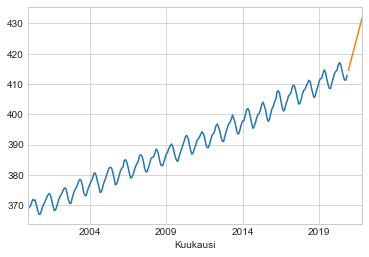

In [16]:
# Viivakaavio havainnoista
df['Hiilidioksidi'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

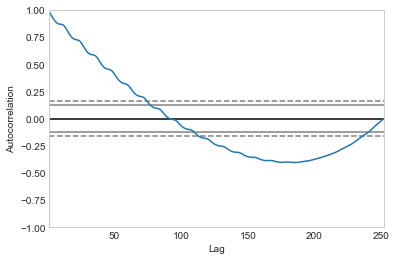

In [18]:
#Aikasarjassa on erotettavissa selkeä neljänkymmenen päivän jaksoissa toistuva kausivaihtelu, jota kaksinkertainen eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan korrelaatio neljänkymmenen päivän takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 0-60 kohdalla on suurehko korrelaatio. Tämä viittaa  kausivaihtelujaksoon. Kuvion katkoviivat edustavat tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 60 kohdalla korrelaatio on katkoviivan yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Hiilidioksidi'])